<h1> A Regression Study of the Effects of Partisanship on the toll of COVID-19</h1>

<h3> w203 UC Berkeley</h3>
<h3> Cziva, Hernandez, Wong</h3>

## Introduction ##

### **Question**: What role did partisanship of states play in the shelter in place order and how did those politics ultimately affect the death toll?

Currently, when someone observes the news, it is flooded with information on the COVID-19 pandemic. Most importantly, the responses taken toward the pandemic are highlighted as well as their preceived outcomes. One can clearly see that this is a partisan difference on how states have reacted to the spread of the disease throughout the country, especially when it comes to the topics of locking down the state (shelter in place) and requiring the use of masks in public. We want to examine **what role did partisanship of states play in the shelter in place orders and how did that stance ultimately effect the death toll?** This insight can help to determine which approach toward the pandemic is the most affective in combating the mortality, either being aggressive (which democratic states have been doing more) or being more laxed (which republican states have mostly been pursuing).

According to experts, shelter in place protocols are one of the major actions that can be taken to help slow the spread of COVID. Unforuntately, the whole ordeal has become political and actions toward establishing shelter in place protocols have been split by party lines. One side argues that the seriousness of the virus is hyperbolized by the media and that shutting down society to prevent the spread the virus will do more damage than the virus itself, while the other side follows the advice of experts and claims that things will only get worse if strong actions are not taken now. By examining our data and modeling the duration of shelter in place protocols (if any estiablished) in various states to the normalized death tolls due to the virus, we will establish insist into which approach toward the virus, aggressive or lax, has been the most effective in combating the mortality of the virus.

## Model Building Process ##

### EDA ###


As we embark on our exploratory analysis, it is important to keep in mind what it is we would like to measure. Our question can be broken down into multiple parts, but ultimately, the objective is to determine if there is a relationship between partisanship and death toll of the states.  To that end, the variables of interest include:

- `total_cases` - Total # of Covid Cases.
- `total_test_results` - Total # of Tests Performed.
- `total_deaths` - # of deaths caused by Covid.
- `death_100k` - Death Rate per 100k.
- `pop_2018`: Population as of 2018.
- `pop_density`: Population Density per Square Miles.
- `Governor Political Affiliation`: Categorical Variable of Governor's Political Party (ie. Republican, Democrat, etc).


In [ ]:
install.packages("car")
install.packages("dplyr")
install.packages("stargazer")
library(lmtest)
library(sandwich)
library(car)
library(dplyr)
library(stargazer)

A number of irregularities exist in the provided dataset.  The list below describes those irregularities and the actions taken:
- Header updated with meaningful and abbreviated variable names.
- **Arizona** appears twice; a capitalized version and a non-capitalized one.  Their data weren't the same so we cross-referenced the data and discarded the version with the incorrect data.
- Some shelter-in-place data was missing.  We cross-referenced the provided dataset with https://www.finra.org/rules-guidance/key-topics/covid-19/shelter-in-place.  Any discrepancies were further cross-referenced with other sites.  Missing data was filled in.
- **Ohio** census data partially missing in provided dataset.  These missing figures were obtained and updated accordingly using data from https://data.census.gov/.
- **Kentucky** missing Total Test Results data.  Data obtained from https://covidtracking.com/data/state/kentucky and dataset updated.

The resulting dataset was compiled in a new file: **covid-data-cleaned.csv**.

In [2]:
# Load Covid data.
c <- read.csv("covid-data-cleaned.csv", header = TRUE)
head(c)

state,total_cases,total_deaths,death_100k,cases_last_7_days,rate_per_100k,total_test_results,date_state_emerg,date_sip_start,date_sip_end,...,pop_2018,pcnt_below_pov_2018,pcnt_ser_ill_risk_covid,count_all_cause_deaths_2018,prop_pop_0_18,prop_pop_19_25,prop_pop_26_34,prop_pop_35_54,prop_pop_55_64,prop_pop_65_over
Alabama,44909,1009,20.6,9804,918.8,449886,3/13/2020,4/4/2020,4/30/2020,...,4887871,16.8,43.1,54352,0.24,0.09,0.12,0.25,0.14,0.17
Alaska,1138,16,2.2,284,154.3,122732,3/11/2020,3/28/2020,4/24/2020,...,737438,10.9,32.8,4453,0.27,0.09,0.13,0.26,0.13,0.12
Arizona,83376,1538,25.2,28038,1367.7,604362,3/11/2020,3/31/2020,5/16/2020,...,7171646,14.0,39.1,59282,0.24,0.09,0.12,0.24,0.12,0.18
Arkansas,23814,287,9.5,4504,790.2,338893,3/11/2020,0,0,...,3013825,17.2,43.5,32336,0.25,0.09,0.12,0.25,0.13,0.17
California,260155,6331,16.0,53722,657.7,4680138,3/4/2020,3/19/2020,0,...,39557045,12.8,33.3,268818,0.24,0.09,0.14,0.26,0.12,0.14
Colorado,34065,1701,299.0,2043,598.1,350717,3/11/2020,3/26/2020,4/27/2020,...,5695564,9.6,31.3,38526,0.24,0.09,0.14,0.26,0.13,0.14


State political party information was not included in the dataset and therefore obtained externally from: https://www.kff.org/other/state-indicator/state-political-parties/.  This information was joined with existing dataset using the `state` variable as the key.

In [3]:
# Load External Data pertaining to State Party Affiliations.
party <- read.csv("Party_by_state.csv", header=FALSE)
head(party)

V1,V2,V3,V4,V5,V6,V7
ï»¿Title: State Political Parties | KFF,,,,,,
Timeframe: 2020,,,,,,
Location,Governor Political Affiliation,State Senate Majority Political Affiliation,State House Majority Political Affiliation,State Attorney General Political Affiliation,State Insurance Commissioner Political Affiliation,Footnotes
United States,26 Republicans; 25 Democrats,20 Democrat; 30 Republican; 1 N/A,20 Democrat; 29 Republican; 2 N/A,8 Appointed; 23 Democrat; 20 Republican,41 Appointed; 3 Democrats; 7 Republicans,
Alabama,Republican,Republican,Republican,Republican,Appointed,
Alaska,Republican,Republican,Republican,Appointed,Appointed,


In [4]:
# Cleanup Party Data
names(party) <- as.matrix(party[3, ])
party <- party[-c(1:3), -c(7)]
head(party)

,Location,Governor Political Affiliation,State Senate Majority Political Affiliation,State House Majority Political Affiliation,State Attorney General Political Affiliation,State Insurance Commissioner Political Affiliation
4,United States,26 Republicans; 25 Democrats,20 Democrat; 30 Republican; 1 N/A,20 Democrat; 29 Republican; 2 N/A,8 Appointed; 23 Democrat; 20 Republican,41 Appointed; 3 Democrats; 7 Republicans
5,Alabama,Republican,Republican,Republican,Republican,Appointed
6,Alaska,Republican,Republican,Republican,Appointed,Appointed
7,Arizona,Republican,Republican,Republican,Republican,Appointed
8,Arkansas,Republican,Republican,Republican,Republican,Appointed
9,California,Democrat,Democrat,Democrat,Democrat,Democrat


In [5]:
# Add Party dataframe to c dataframe
b <- left_join(c, party, by=c( "state" = "Location"))

In order to utilize shelter-in-place dates meaningfully, we transformed `date_sip_start` and `date_sip_end` variables to derive the new variable `sip_duration`.  This new variable is intended to serve as an indication of state governors' political will in shutting down for the purpose of stemming the spread of COVID-19.

In [6]:
# Convert Values Under SIP to Date Values so that they can be Subtracted
b$date_sip_start <- as.character(b$date_sip_start)
b$date_sip_start <- as.Date(b$date_sip_start, format='%m/%d/%Y')

b$date_sip_end <- as.character(b$date_sip_end)
b$date_sip_end[b$date_sip_end == '0'] <- "7/2/2020" # Last day data was updated for shelter in place
b$date_sip_end <- as.Date(b$date_sip_end, format='%m/%d/%Y')

In [7]:
# Form Date Difference
b$sip_duration <- b$date_sip_end - b$date_sip_start
b$sip_duration[is.na(b$sip_duration)] <- 0

In [8]:
head(b)

state,total_cases,total_deaths,death_100k,cases_last_7_days,rate_per_100k,total_test_results,date_state_emerg,date_sip_start,date_sip_end,...,prop_pop_26_34,prop_pop_35_54,prop_pop_55_64,prop_pop_65_over,Governor Political Affiliation,State Senate Majority Political Affiliation,State House Majority Political Affiliation,State Attorney General Political Affiliation,State Insurance Commissioner Political Affiliation,sip_duration
Alabama,44909,1009,20.6,9804,918.8,449886,3/13/2020,2020-04-04,2020-04-30,...,0.12,0.25,0.14,0.17,Republican,Republican,Republican,Republican,Appointed,26 days
Alaska,1138,16,2.2,284,154.3,122732,3/11/2020,2020-03-28,2020-04-24,...,0.13,0.26,0.13,0.12,Republican,Republican,Republican,Appointed,Appointed,27 days
Arizona,83376,1538,25.2,28038,1367.7,604362,3/11/2020,2020-03-31,2020-05-16,...,0.12,0.24,0.12,0.18,Republican,Republican,Republican,Republican,Appointed,46 days
Arkansas,23814,287,9.5,4504,790.2,338893,3/11/2020,NA,2020-07-02,...,0.12,0.25,0.13,0.17,Republican,Republican,Republican,Republican,Appointed,0 days
California,260155,6331,16.0,53722,657.7,4680138,3/4/2020,2020-03-19,2020-07-02,...,0.14,0.26,0.12,0.14,Democrat,Democrat,Democrat,Democrat,Democrat,105 days
Colorado,34065,1701,299.0,2043,598.1,350717,3/11/2020,2020-03-26,2020-04-27,...,0.14,0.26,0.13,0.14,Democrat,Democrat,Democrat,Democrat,Appointed,32 days


Categorical variables cannot be used in linear regression.  Thus, we transformed `Governor Political Affiliation` using the following function:

In [9]:
# Transform Political Party into Numeric values.
partyAsNumeric <- function(partyList) {
  
  numericList <- c()
  
  for (party in partyList) {
    code = 3
    if (!is.na(party)) {
      if (party == "Republican") {
        code = 1
      }
      if (party == 'Democrat') {
        code = 2
      }
    } else {
      code = 3
    }

    numericList <- c(numericList, code)
  }
  numericList
}

In [10]:
# Add "gov_party" Column to "b" which is a numeric representation of Governor Political Affiliation.
b[["gov_party"]] <- partyAsNumeric(b$`Governor Political Affiliation`)
colnames(b)

[1] "state"                                             
 [2] "total_cases"                                       
 [3] "total_deaths"                                      
 [4] "death_100k"                                        
 [5] "cases_last_7_days"                                 
 [6] "rate_per_100k"                                     
 [7] "total_test_results"                                
 [8] "date_state_emerg"                                  
 [9] "date_sip_start"                                    
[10] "date_sip_end"                                      
[11] "date_close_non_ess_bus"                            
[12] "date_bus_reopen"                                   
[13] "date_emp_face_mask_req"                            
[14] "unemploy_insur_max_amt"                            
[15] "pop_density"                                       
[16] "pop_2018"                                          
[17] "pcnt_below_pov_2018"                               
[18] "pcnt_ser_ill_risk_covid"                           
[19] "count_all_cause_deaths_2018"                       
[20] "prop_pop_0_18"                                     
[21] "prop_pop_19_25"                                    
[22] "prop_pop_26_34"                                    
[23] "prop_pop_35_54"                                    
[24] "prop_pop_55_64"                                    
[25] "prop_pop_65_over"                                  
[26] "Governor Political Affiliation"                    
[27] "State Senate Majority Political Affiliation"       
[28] "State House Majority Political Affiliation"        
[29] "State Attorney General Political Affiliation"      
[30] "State Insurance Commissioner Political Affiliation"
[31] "sip_duration"                                      
[32] "gov_party"

***

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   29.00   46.00   47.39   63.00  105.00 

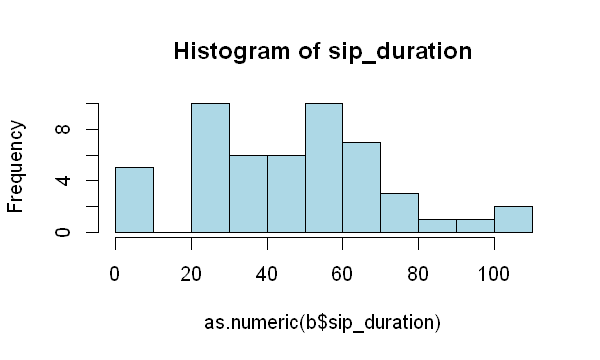

In [11]:
# Summarize Newly Transformed Shelter-in-Place variable "sip_duration".
summary(as.numeric(b$sip_duration))

# Render Histogram of "sip_duration".
options(repr.plot.height=3, repr.plot.width=5)
hist(as.numeric(b$sip_duration), col="lightblue", breaks=10, main="Histogram of sip_duration")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.30    9.50   18.00   42.32   46.45  354.30 

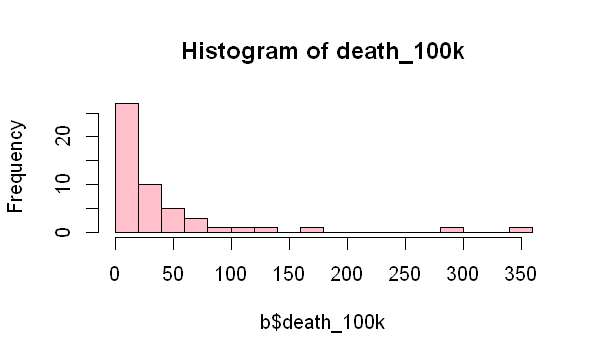

In [12]:
# Summarize "death_100K".
summary(b$death_100k)

# Render Histogram of "death_100k".
options(repr.plot.height=3, repr.plot.width=5)
hist(b$death_100k, col="pink", breaks=20, main="Histogram of death_100k")

When looking at the plot comparing shelter in place duration to death per 100k people, two outliers from the rest of the data are shown. One of the outliers, the larger one, can be explained by the situation that occurred in New York during the early during the outbreak in the United States. Through investigation of the values in the dataframe, b, the other outlier is Colorado which is unexplained. After reviewing the Center of Disease Control site at https://www.cdc.gov/coronavirus/2019-ncov/cases-updates/us-cases-deaths.html, we conclude that this is incorrect and the death per 100k variable should be recalculated.  The death_100k is updated with the correct calculataion below:

In [13]:
# Clean and Transform data in "death_100k" with Correct Calculation.
dr <- b$total_deaths / (b$pop_2018 / 100000)
b$death_100k <- round(dr, digits=1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.30    9.50   18.00   33.22   38.75  170.70 

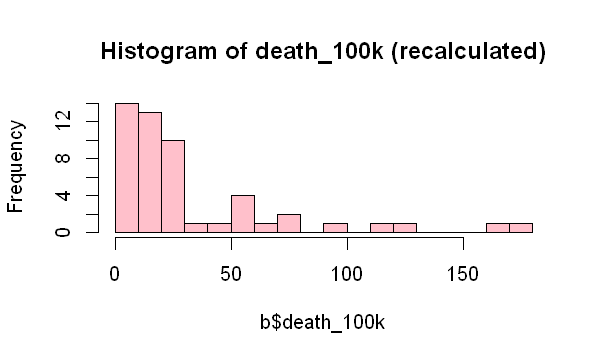

In [14]:
# Summarize "death_100K".
summary(b$death_100k)

# Render Histogram of "death_100k".
options(repr.plot.height=3, repr.plot.width=5)
hist(b$death_100k, col="pink", breaks=20, main="Histogram of death_100k (recalculated)")

In [15]:
# Create Dataframe of Variables of Interest.
c.data<- data.frame(b$total_cases/b$total_test_results, 
                    b$total_deaths/b$pop_2018, 
                    b$death_100k, 
                    b$pop_density,
                    as.numeric(b$sip_duration),
                    b$gov_party)

# Show column names of data frame.
colnames(c.data)

[1] "b.total_cases.b.total_test_results" "b.total_deaths.b.pop_2018"         
[3] "b.death_100k"                       "b.pop_density"                     
[5] "as.numeric.b.sip_duration."         "b.gov_party"

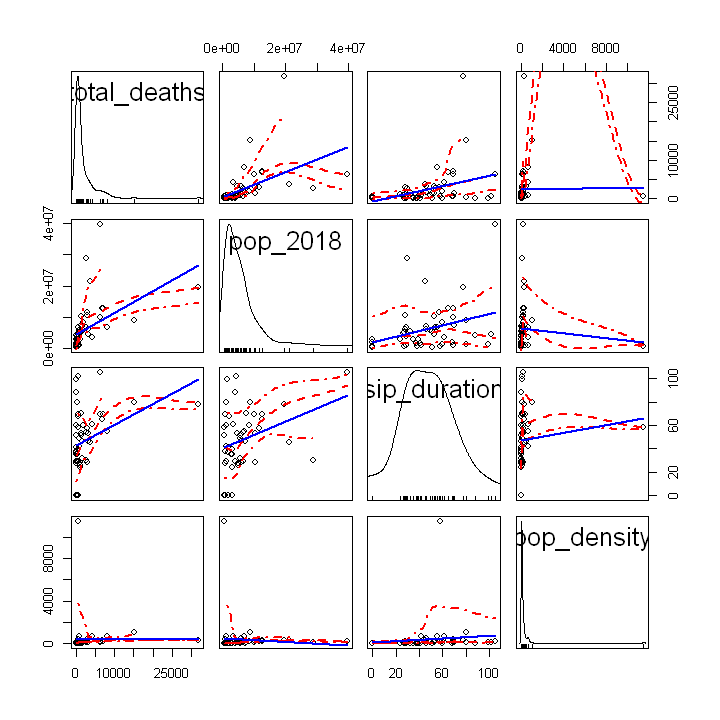

In [16]:
options(repr.plot.height=6, repr.plot.width=6)
scatterplotMatrix(b[ , c("total_deaths", "pop_2018", "sip_duration", "pop_density")], 
                    regLine=list(col=c("blue","green", "yellow")), 
                    col=c("black"), smooth=list(col.smooth="red", col.spread="red"))

In [17]:
# Abbreviate as.numeric.b.sip_duration.
names(c.data)[names(c.data) == "as.numeric.b.sip_duration."] <- "sip_duration"

# Determine if there are Correlations between the Variables of Interest.
cor(c.data)

,b.total_cases.b.total_test_results,b.total_deaths.b.pop_2018,b.death_100k,b.pop_density,sip_duration,b.gov_party
b.total_cases.b.total_test_results,1.00000000,0.4859632,0.4858318,0.1771116,-0.1040616,-0.09811709
b.total_deaths.b.pop_2018,0.48596324,1.0000000,0.9999997,0.2731489,0.3222071,0.31704895
b.death_100k,0.48583178,0.9999997,1.0000000,0.2732297,0.3221028,0.31700229
b.pop_density,0.17711159,0.2731489,0.2732297,1.0000000,0.1027464,0.16901853
sip_duration,-0.10406158,0.3222071,0.3221028,0.1027464,1.0000000,0.61322214
b.gov_party,-0.09811709,0.3170489,0.3170023,0.1690185,0.6132221,1.00000000


Based on the Correlation Matrix above, it appears we have meaningful correlations between (total_deaths/pop_2018) and the variables of interest which will prove useful in building our models.

### Models ###


In [18]:
# Add "gov_party" Column to "b" which is a numeric representation of Governor Political Affiliation.
b[["gov_party"]] <- partyAsNumeric(b$`Governor Political Affiliation`)
colnames(b)

[1] "state"                                             
 [2] "total_cases"                                       
 [3] "total_deaths"                                      
 [4] "death_100k"                                        
 [5] "cases_last_7_days"                                 
 [6] "rate_per_100k"                                     
 [7] "total_test_results"                                
 [8] "date_state_emerg"                                  
 [9] "date_sip_start"                                    
[10] "date_sip_end"                                      
[11] "date_close_non_ess_bus"                            
[12] "date_bus_reopen"                                   
[13] "date_emp_face_mask_req"                            
[14] "unemploy_insur_max_amt"                            
[15] "pop_density"                                       
[16] "pop_2018"                                          
[17] "pcnt_below_pov_2018"                               
[18] "pcnt_ser_ill_risk_covid"                           
[19] "count_all_cause_deaths_2018"                       
[20] "prop_pop_0_18"                                     
[21] "prop_pop_19_25"                                    
[22] "prop_pop_26_34"                                    
[23] "prop_pop_35_54"                                    
[24] "prop_pop_55_64"                                    
[25] "prop_pop_65_over"                                  
[26] "Governor Political Affiliation"                    
[27] "State Senate Majority Political Affiliation"       
[28] "State House Majority Political Affiliation"        
[29] "State Attorney General Political Affiliation"      
[30] "State Insurance Commissioner Political Affiliation"
[31] "sip_duration"                                      
[32] "gov_party"

In [19]:
(cmodel1 <- lm(total_deaths/pop_2018 ~ gov_party, data=b))
summary(cmodel1)$r.square


Call:
lm(formula = total_deaths/pop_2018 ~ gov_party, data = b)

Coefficients:
(Intercept)    gov_party  
 -3.305e-05    2.451e-04  


[1] 0.10052

In [20]:
(cmodel2 <- lm(total_deaths/pop_2018 ~ pop_density + gov_party, data=b))
summary(cmodel2)$r.square


Call:
lm(formula = total_deaths/pop_2018 ~ pop_density + gov_party, 
    data = b)

Coefficients:
(Intercept)  pop_density    gov_party  
 -1.069e-05    5.516e-08    2.156e-04  


[1] 0.150145

In [21]:
(cmodel3 <- lm(total_deaths/pop_2018 ~ sip_duration + pop_density + gov_party, data=b))
summary(cmodel3)$r.square


Call:
lm(formula = total_deaths/pop_2018 ~ sip_duration + pop_density + 
    gov_party, data = b)

Coefficients:
 (Intercept)  sip_duration   pop_density     gov_party  
  -1.290e-05     3.105e-06     5.521e-08     1.183e-04  


[1] 0.1763987

`total_deaths`, `pop_2018`, and `pop_density` appears right skewed and may be impacting our model.  Performing logarithmic transformations on those variables to alleviate.  Hence the following model:

In [22]:
(cmodel4 <- lm(log(total_deaths/pop_2018) ~ sip_duration + log(pop_density) + gov_party, data=b))
summary(cmodel4)$r.square


Call:
lm(formula = log(total_deaths/pop_2018) ~ sip_duration + log(pop_density) + 
    gov_party, data = b)

Coefficients:
     (Intercept)      sip_duration  log(pop_density)         gov_party  
      -11.270107         -0.008056          0.548261          0.395268  


[1] 0.5234919

### Assessment of CLM Assumptions ###

We are going to assess the assumptions on our best model, `cmodel4`. Below, let's plot the most common diagnostic plots for our model.

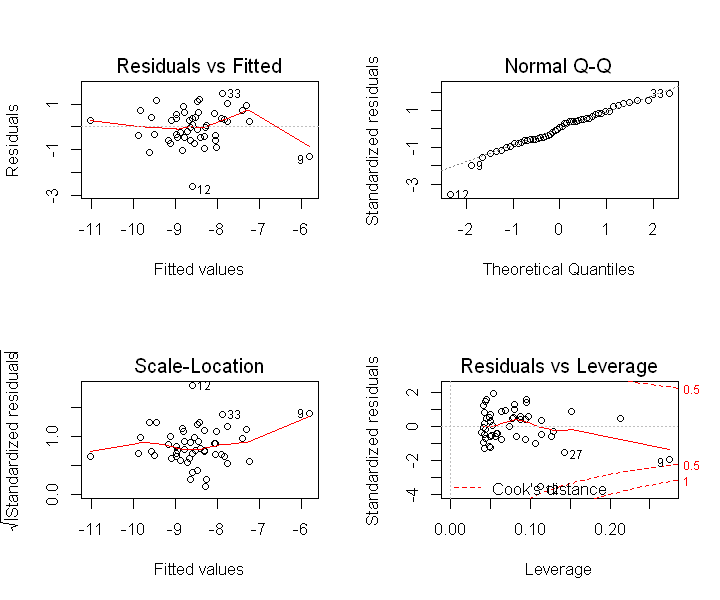

In [23]:
options(repr.plot.height=5, repr.plot.width=6)
par(mfrow=c(2,2))
plot(cmodel4)

- Linearity (MLR.1)

This does not need testing. We have a model that expresses linear relationship. Log is an accepted linear transformation.

- Random sampling (MLR.2)

Autocorrelation testing: Durbin-Watson test. This tests the hypothesis of "no first order autocorrelation in the model". 

In [24]:
dwtest(cmodel4)


	Durbin-Watson test

data:  cmodel4
DW = 1.569, p-value = 0.05668
alternative hypothesis: true autocorrelation is greater than 0


We have a value of 1.56 that is inside the acceptable range (1.5-2.5) and a low ~0.05 p value, there therefore we can conclude that there is no autocorrelation in our data.

- No Perfect collinearity (MLR.3)

Let's see if there is correlation between our predictors.

In [25]:
vif(cmodel4)

sip_duration log(pop_density)        gov_party 
        1.869282         1.247323         1.603700

The smallest possible value of VIF is one (absence of multicollinearity). As a rule of thumb, a VIF value that exceeds 5 or 10 indicates a problematic amount of collinearity (James et al. 2014).

As our VIF values are low, we can conclude that we don't have perfect collinearity.

- Zero conditional mean (MLR.4)

Let's look at the fitted values and residual plot (above) and look if the residuals are around zero or not. We can see that zero conditional mean is satisfied with mean residuls around zero.

- Homoskedasticity (MLR.5)

Let's look at the  fitted values and residual plot and see if the band grows, shrinks or stays the same. As it looks the same, homoskedasticity is satisfied, although we would like to add that there could be more data to make this argument stronger.

- Normality of errors (MLR.6)

Visually looking at residuals histogram:

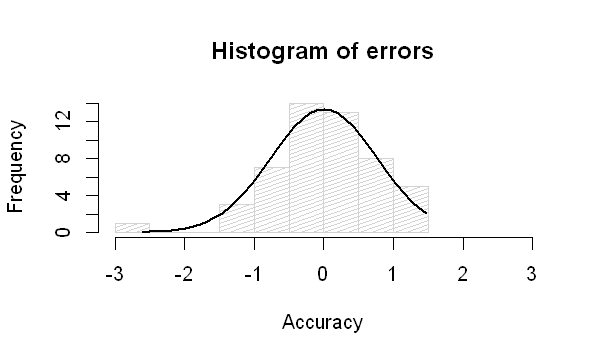

In [26]:
options(repr.plot.height=3, repr.plot.width=5)
h <- hist(cmodel4$residuals, density = 10,
          col = "lightgray", xlab = "Accuracy", main = "Histogram of errors", xlim = c(-3,3)) 
xfit <- seq(min(cmodel4$residuals), max(cmodel4$residuals), length = 40) 
yfit <- dnorm(xfit, mean = mean(cmodel4$residuals), sd = sd(cmodel4$residuals)) 
yfit <- yfit * diff(h$mids[1:2]) * length(cmodel4$residuals) 

lines(xfit, yfit, col = "black", lwd = 2)

Satisfied by visual observation - with one outlier at -3.

### Regression Table ###


In [27]:
se.model1 <- sqrt(diag(vcovHC(cmodel1)))
se.model2 <- sqrt(diag(vcovHC(cmodel2)))
se.model3 <- sqrt(diag(vcovHC(cmodel3)))
se.model4 <- sqrt(diag(vcovHC(cmodel4)))

In [ ]:
# Forms a regression table
star_output <- stargazer(cmodel1, cmodel2, cmodel3, cmodel4, type="html", 
          title = "Linear Models Predicting Normalized degree of COVID cases",
          se = list(se.model1, se.model2, se.model3, se.model4),
          omit.stat = "f",
          digits=7,
          ci=TRUE,
          star.cutoffs = c(0.05, 0.01, 0.001))

In [29]:
# Displays html code generated by stargazer
library(IRdisplay)
display_html(toString(star_output))

, Linear Models Predicting Normalized degree of COVID cases , Dependent variable: , , total_deaths/pop_2018 log(total_deaths/pop_2018) , (1) (2) (3) (4) , sip_duration 0.0000031 -0.0080558 , (-0.0000066, 0.0000128) (-0.0235280, 0.0074165) , , pop_density 0.0000001 0.0000001 , (-0.0000028, 0.0000029) (-0.0000028, 0.0000029) , , log(pop_density) 0.5482609 *** , (0.3146842, 0.7818376) , , gov_party 0.0002451 * 0.0002156 0.0001183 0.3952678 , (0.0000330, 0.0004572) (-0.0000849, 0.0005161) (-0.0001084, 0.0003450) (-0.1311785, 0.9217140) , , Constant -0.0000330 -0.0000107 -0.0000129 -11.2701100 *** , (-0.0002980, 0.0002319) (-0.0003115, 0.0002901) (-0.0003104, 0.0002846) (-12.2581400, -10.2820800) , , Observations 51 51 51 51 , R 2 0.1005200 0.1501450 0.1763987 0.5234919 , Adjusted R 2 0.0821633 0.1147344 0.1238284 0.4930765 , Residual Std. Error 0.0003740 (df = 49) 0.0003673 (df = 48) 0.0003654 (df = 47) 0.7835806 (df = 47) , Note: * p<0.05; ** p<0.01; *** p<0.001 ,

As can be seen form the regression table displayed above, there are two dependent variables, one being the logarithmic version of the other. As a result, the models can not be directly compared but the progression toward our final model can be seen from the table. The final model is displayed in magnitude rather than its orginal scale.

Note, for the first three models, the common coefficients tend to decrease as more variables are added. This is due to the model relying on more variables to determine outcome. The models that have more than one variable determine the coefficient by hold on the variables constant rather than omitting them, which gives a smaller value than before. 

The final model shows a $r_2$ of $0.493$ and shows statistical significants for one of the coefficients, `log(pop_density)`, indicating the p-value is below 0.001. The other variables in the model on the other hand show no statistical significants. This may be to the sample size not being large enough to account for the variability in the data.

The progress of our model also displays practicial significance. This can be seen by examining the confidence intervals of each of the coefficients. As we move from `cmodel1` to `cmodel3`, the confidence intervals for each coefficient becomes a little more narrower. Unforunately, since out last model has shift on what each variable means it is difficult to compare the practicial significance to the previous model.

### Discussion of Omitted Variables ###


OLS estimators become biased when variables that belong the population model are omitted. Explained in simple terms, when an important variable is left out of the model, the coefficients of the included variables end up "doing extra work" for the model to perform. Here are omitted variables that could potentially bias our results:

|Omitted Variable Name|Description|Estimated Direction of Bias on $\beta_3$ |
|:-- |:-- |:-: |
|`date_gen_pub_mask_req`|Date of mask requirement for general public, if any.|Negative (toward zero)|
|`social_dist_attitudes`|Categorical variable, 1 (Support) - 5 (Oppose), measures attitudes towards social distancing.|Positive (away from zero)|
|`prop_wfh_option`|Proportion of population with option to work from home.|Negative (toward zero)|
|`testing_avail`|Availability of COVID-90 Testing.|Negative (toward zero)|
|`ctac_tracing_date`|Date contract tracing program implemented.|Negative (toward zero)|
|`pcnt_ser_ill_risk_covid`|Percent of people vulnerable if infected| Positive(away from zero)|

It should be noted that the Omitted Variables proposed above must be compared with an existing variable in our model to derive the direction of the bias (away or toward zero). Below, again, is our model:

$$log(total\_deaths/pop\_2018) = \beta_0 + \beta_1 sip\_duration + \beta_2 gov\_party + \beta_3 log(pop\_density) $$

We arbitrarily chose to compare the omitted variables to $\beta_3$.  $\beta_3$ is postive (because the independent variable `pop_density` and dependent variable `total_deaths / pop_2018` is postively correlated). In short, the denser the population, the higher the death toll.  Intuitively speaking, anything that stems COVID-19 spread, that was omitted, will have a **negative** bias effect on $\beta_3$.  Any omitted variable that could increases the spread, will have a **positive** bias on $\beta_3$.

## Conclusion


We conclude this report by revisiting our question, assessing hypothesis, and commenting on our findings.

The question we endeavored to answer in this lab was: "What role did partisanship of states play in the shelter in place order and how did those politics ultimately affect the death toll?"  

Governors have direct control on state policies and emergency measures that address pandemics such as COVID-19.  They evaluate many factors when making these decisions and unfortunately, there are times when the value of human life isn't the only consideration.  Our hypothesis is that **Republican governors do a poorer job at managing this crisis than do their Democratic counterparts and therefore should have a higher death rate in their states**.

The model we settled on in this analysis was:

$$log(total\_deaths/pop\_2018) = -11.27 -0.0081 sip\_duration + 0.3953 gov\_party + 0.5483 log(pop\_density) $$
 
While we can see the the `gov_party` seemed to play a role in the death toll, it was actually `pop_density` that was the biggest factor. Shelter-in-place duration had a negative effect on the death tool, as expected. In terms of the Null Hypothesis that governor partisanship has nothing to do with a state's death toll, we failed to reject it.